# Importing libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers, models
from google.colab import drive

# Mounting drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Paths

In [3]:
dataset_dir = "/content/drive/MyDrive/Dataset of CNN Model"  # contains: brain/, skin/, lung/, bloodcell/
img_size = (128, 128)
batch_size = 32

In [4]:
print(os.listdir(dataset_dir))  # should list ['brain','skin','lung','bloodcell']

['Bloodcells Image', 'Skin Image', 'Lungs Image', 'Brain MRI Image']


# Data Generators

In [5]:
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",   # <--- changed to categorical for multi-class
    subset="training"
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",   # <--- changed here also
    subset="validation"
)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


# Label Mapping

In [6]:
labels = {v: k for k, v in train_gen.class_indices.items()}
np.save("organ_labels.npy", labels)
print("Label mapping saved:", labels)

Label mapping saved: {0: 'Bloodcells Image', 1: 'Brain MRI Image', 2: 'Lungs Image', 3: 'Skin Image'}


# Building CNN Model

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(len(labels), activation="softmax")   # <--- multi-class output
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [8]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)
model.save("organ_classifier.h5")
print("Model saved as organ_classifier.h5")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1063s 11s/step - accuracy: 0.8176 - loss: 0.4655 - val_accuracy: 0.9975 - val_loss: 0.0116
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.9870 - loss: 0.0433 - val_accuracy: 0.9987 - val_loss: 0.0136
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.9939 - loss: 0.0175 - val_accuracy: 0.9987 - val_loss: 0.0043
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.9963 - loss: 0.0123 - val_accuracy: 0.9937 - val_loss: 0.0183
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 234ms/step - accuracy: 0.9957 - loss: 0.0173 - val_accuracy: 0.9962 - val_loss: 0.0160
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.9987 - val_loss: 0.0157
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 236ms/step - accuracy: 0.9922 - loss: 0.0458 - val_accuracy: 0.9987 - val_loss: 0.0073
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.9978 - loss: 0

Model saved as organ_classifier.h5


# Plots

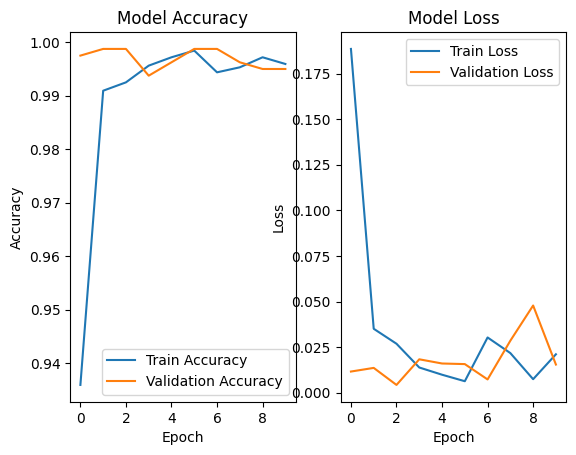

In [9]:
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Confusion Matrix

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step


<Figure size 800x600 with 0 Axes>

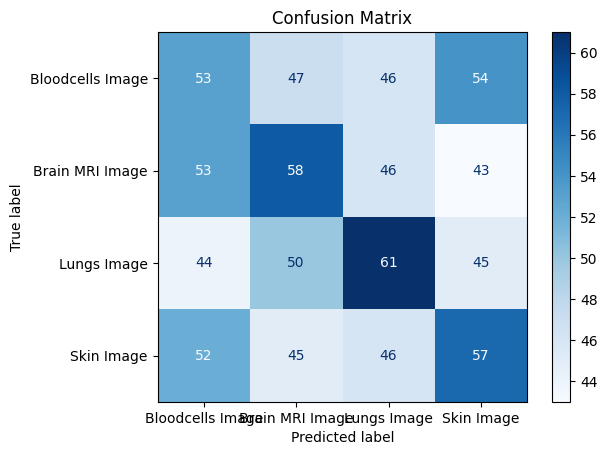

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on validation set
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes  # true labels

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(labels.values()))

plt.figure(figsize=(8,6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Predict a single image

In [11]:
def predict_single(img_path):
    labels = np.load("organ_labels.npy", allow_pickle=True).item()
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    pred_class = np.argmax(pred, axis=1)[0]  # get class index
    result = labels[pred_class]

    plt.imshow(load_img(img_path, target_size=img_size))
    plt.title(f"Predicted: {result}")
    plt.axis("off")
    plt.show()

    return result

# Example

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


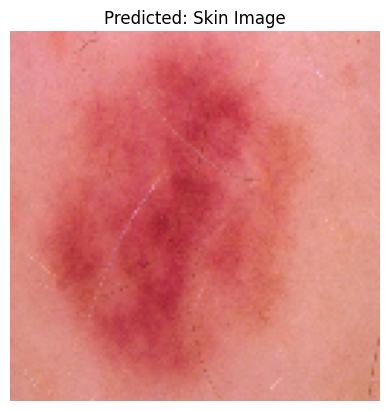

'Skin Image'

In [14]:
predict_single("/content/val1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


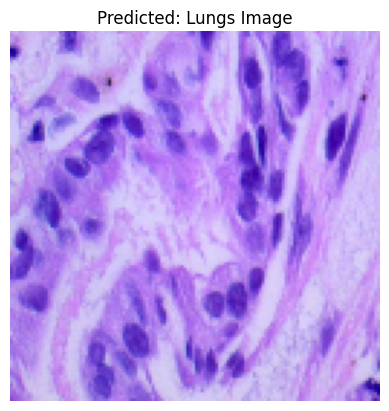

'Lungs Image'

In [15]:
predict_single("/content/val2.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


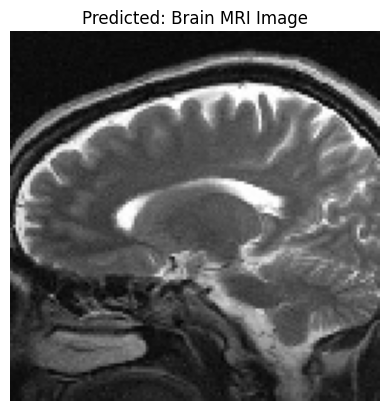

'Brain MRI Image'

In [16]:
predict_single("/content/val3.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


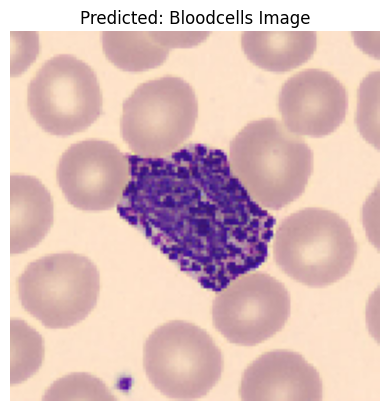

'Bloodcells Image'

In [17]:
predict_single("/content/val4.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


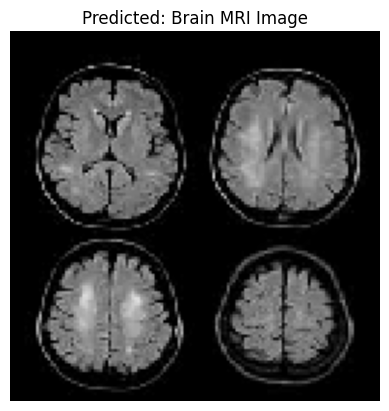

'Brain MRI Image'

In [18]:
predict_single("/content/cnn-01.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


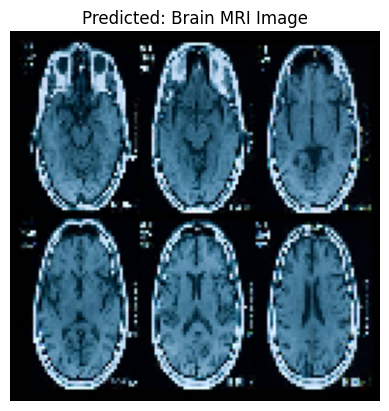

'Brain MRI Image'

In [19]:
predict_single("/content/cnn-02.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


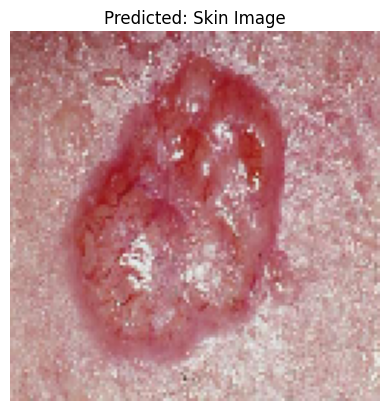

'Skin Image'

In [20]:
predict_single("/content/cnn-03.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


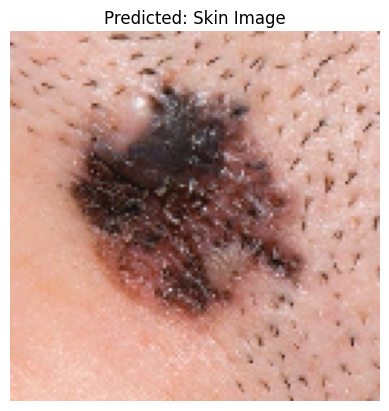

'Skin Image'

In [21]:
predict_single("/content/cnn-04.jpg")

In [22]:
from google.colab import files
files.download("organ_classifier.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


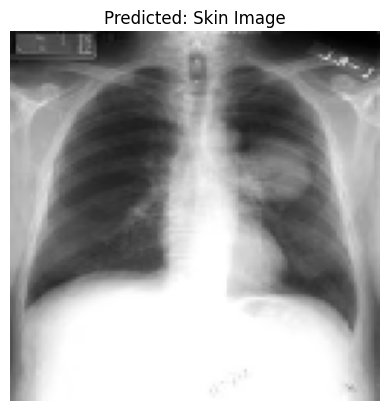

'Skin Image'

In [23]:
predict_single("/content/cnn-05.avif")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


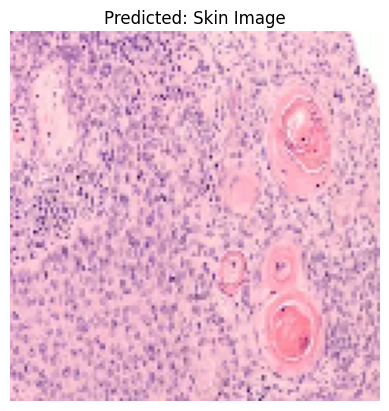

'Skin Image'

In [24]:
predict_single("/content/cnn-06.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


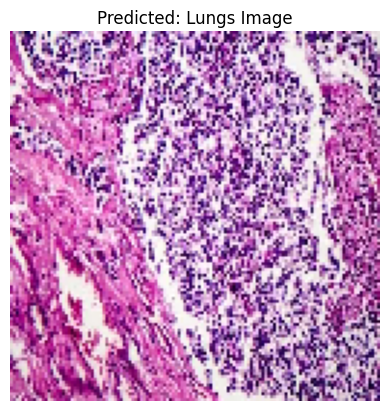

'Lungs Image'

In [25]:
predict_single("/content/cnn-07.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


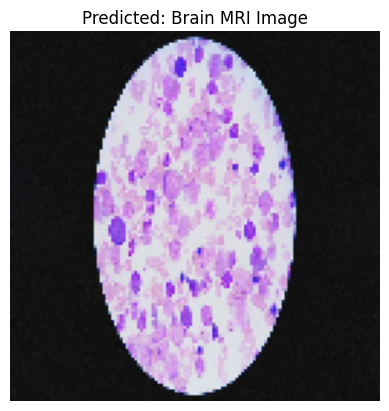

'Brain MRI Image'

In [26]:
predict_single("/content/cnn-08.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


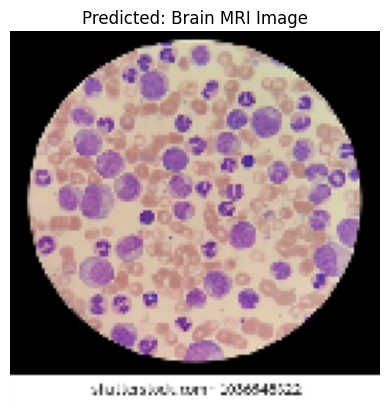

'Brain MRI Image'

In [27]:
predict_single("/content/cnn-09.webp")